<a href="https://colab.research.google.com/github/TheHexa1/Kaggle/blob/master/Kaggle_housing_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# To install rfpimp, a package to calculate permutation importance, in google colab
!pip install rfpimp

  Created wheel for rfpimp: filename=rfpimp-1.3.4-cp36-none-any.whl size=10087 sha256=0bec28aec864e5966b0462e6c00c84c51ff47e225850d3b937a837bf2b197e7a
  Stored in directory: /root/.cache/pip/wheels/c7/35/67/4065afd69df4c0be693ecdec8a9c1433a23f80ee60395272ba
Successfully built rfpimp


In [0]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor

In [2]:
# load dataset
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


In [3]:
# check null values
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
# remove unnecessary columns as well as columns having high number of null values

X = df_train.drop(columns=['Id','Alley','FireplaceQu','PoolQC','Fence','MiscFeature'])
test_set = df_test.drop(columns=['Id','Alley','FireplaceQu','PoolQC','Fence','MiscFeature'])

print(X.shape, test_set.shape)

(1460, 75) (1459, 74)


In [0]:
# to attenuate the effect of outliers
y = np.log(X['SalePrice'])

X_new = X.drop(columns=['SalePrice']) #, 'OverallQual', 'GrLivArea', 'YearBuilt'])

In [0]:
# one hot encoding for categorical columns
X_encoded = pd.get_dummies(X_new)
test_encoded = pd.get_dummies(test_set)

# impute missing values
X_imputed = X_encoded.interpolate(method='linear')
test_imputed = test_encoded.interpolate(method='linear')

# uncomment to check if all columns are filled
# X_imputed.isnull().any()


In [0]:
# Split dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, random_state=33, test_size=0.2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


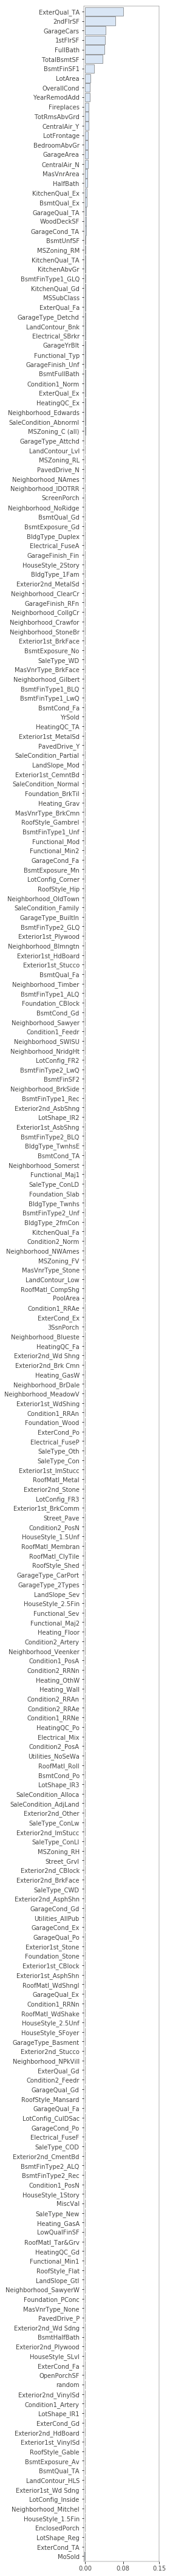

In [28]:
# Random forest permutation Importance for feature selection
from rfpimp import *
from sklearn.ensemble import RandomForestRegressor

X_train['random'] = np.random.random(size=len(X_train))
X_test['random'] = np.random.random(size=len(X_test))

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)

imp = importances(rf, X_test, y_test) # permutation
viz = plot_importances(imp)
viz.view()

In [358]:
# keep only top 43 features
print(imp.shape)
imp[:56].index

(268, 1)


Index(['ExterQual_TA', '2ndFlrSF', 'GarageCars', '1stFlrSF', 'FullBath',
       'TotalBsmtSF', 'BsmtFinSF1', 'LotArea', 'OverallCond', 'YearRemodAdd',
       'Fireplaces', 'TotRmsAbvGrd', 'CentralAir_Y', 'LotFrontage',
       'BedroomAbvGr', 'GarageArea', 'CentralAir_N', 'MasVnrArea', 'HalfBath',
       'KitchenQual_Ex', 'BsmtQual_Ex', 'GarageQual_TA', 'WoodDeckSF',
       'GarageCond_TA', 'BsmtUnfSF', 'MSZoning_RM', 'KitchenQual_TA',
       'KitchenAbvGr', 'BsmtFinType1_GLQ', 'KitchenQual_Gd', 'MSSubClass',
       'ExterQual_Fa', 'GarageType_Detchd', 'LandContour_Bnk',
       'Electrical_SBrkr', 'GarageYrBlt', 'Functional_Typ', 'GarageFinish_Unf',
       'BsmtFullBath', 'Condition1_Norm', 'ExterQual_Ex', 'HeatingQC_Ex',
       'Neighborhood_Edwards', 'SaleCondition_Abnorml', 'MSZoning_C (all)',
       'GarageType_Attchd', 'LandContour_Lvl', 'MSZoning_RL', 'PavedDrive_N',
       'Neighborhood_NAmes', 'Neighborhood_IDOTRR', 'ScreenPorch',
       'Neighborhood_NoRidge', 'BsmtQual_Gd', 'B

In [0]:
# feature selection
# These features are selected by iterative permutation importance and then removed from train set to get remaining features:
#'OverallQual', 'GrLivArea', 'YearBuilt'
features = ['OverallQual', 'GrLivArea', 'YearBuilt', 'ExterQual_TA', '2ndFlrSF', 'GarageCars', '1stFlrSF', 'FullBath',
       'TotalBsmtSF', 'BsmtFinSF1', 'LotArea', 'OverallCond', 'YearRemodAdd',
       'Fireplaces', 'TotRmsAbvGrd', 'CentralAir_Y', 'LotFrontage',
       'BedroomAbvGr', 'GarageArea', 'CentralAir_N', 'MasVnrArea', 'HalfBath',
       'KitchenQual_Ex', 'BsmtQual_Ex', 'GarageQual_TA', 'WoodDeckSF',
       'GarageCond_TA', 'BsmtUnfSF', 'MSZoning_RM', 'KitchenQual_TA',
       'KitchenAbvGr', 'BsmtFinType1_GLQ', 'KitchenQual_Gd', 'MSSubClass',
       'ExterQual_Fa', 'GarageType_Detchd', 'LandContour_Bnk',
       'Electrical_SBrkr', 'GarageYrBlt', 'Functional_Typ', 'GarageFinish_Unf',
       'BsmtFullBath', 'Condition1_Norm', 'ExterQual_Ex', 'HeatingQC_Ex',
       'Neighborhood_Edwards', 'SaleCondition_Abnorml', 'MSZoning_C (all)',
       'GarageType_Attchd', 'LandContour_Lvl', 'MSZoning_RL', 'PavedDrive_N',
       'Neighborhood_NAmes','Neighborhood_IDOTRR', 'ScreenPorch',
       'Neighborhood_NoRidge', 'BsmtQual_Gd', 'BsmtExposure_Gd', 
       'BldgType_Duplex']

X_train_trun = X_train[features]
X_test_trun = X_test[features]

test_trun = test_imputed[features]

In [171]:
# Normalizing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1,1))
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_trun), columns=X_train_trun.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_trun), columns=X_test_trun.columns)

test_scaled = pd.DataFrame(scaler.transform(test_trun), columns=test_trun.columns)

X_train_scaled.shape

(1168, 59)

In [280]:
# full train set for training
X_full_set = X_train_scaled.append(X_test_scaled)
y_full_set = y_train.append(y_test)
print(X_train_scaled.shape, X_test_scaled.shape)
print(X_full_set.shape, y_full_set.shape)

(1168, 59) (292, 59)
(1460, 59) (1460,)


In [356]:
from sklearn import svm

# train on full set for submission
# svm_rg = svm.SVR(kernel='rbf', C=2.12, epsilon=0.03).fit(X_full_set, y_full_set) #rank-380, mae = 14276.51869
# test_preds = svm_rg.predict(test_scaled)

svm_rg = svm.SVR(kernel='rbf', C=2.12, epsilon=0.03)
# svm_rg = svm.SVR(kernel='poly', C=3, epsilon=0.03)

preds = svm_rg.fit(X_train_scaled, y_train).predict(X_test_scaled)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [357]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print("SVM mae: ", mean_absolute_error(np.exp(y_test), np.exp(preds)))
print("SVM rmse: ",np.sqrt(mean_squared_error(np.exp(y_test), np.exp(preds))))

SVM mae:  12728.833756089114
SVM rmse:  22647.41597155068


In [160]:
# train on full set for submission
# xgb_rg = XGBRegressor(n_estimators=186).fit(X_full_set, y_full_set)
# test_preds = xgb_rg.predict(test_scaled)

eval_set = (X_test_scaled, y_test)
n_estimators = 186
# uncomment for testing performance
xgb_rg = XGBRegressor(n_estimators=n_estimators).fit(X_train_scaled, y_train)
preds = xgb_rg.predict(X_test_scaled)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[04:20:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [161]:
print("XGB mae: ",mean_absolute_error(np.exp(y_test), np.exp(preds)))
print("XGB rmse: ",np.sqrt(mean_squared_error(np.exp(y_test), np.exp(preds))))

XGB mae:  14758.851856806503
XGB rmse:  20923.665614129073


In [283]:
# to compare top 5 predictions
print(np.exp(y_test[:5]))
print(np.exp(preds[:5]))

753     275500.0
445     127500.0
1149    143000.0
1300    225000.0
1369    232000.0
Name: SalePrice, dtype: float64
[275587.46118348 145978.16295278 143688.11053258 225322.54118458
 234123.82670016]


In [0]:
#generate submission file

output = pd.DataFrame({'Id': df_test.Id,
                      'SalePrice': np.exp(test_preds)})
output.to_csv('submission.csv', index=False)

In [325]:
pd.read_csv('submission.csv').head()

,Id,SalePrice
0,1461,119894.354839
1,1462,155448.043783
2,1463,183311.067733
3,1464,200633.143031
4,1465,192826.275736
